In [1]:
import os
import warnings
from pprint import pprint
import descarteslabs as dl
from osgeo import gdal
import numpy as np
from descarteslabs.client.services import Catalog

In [ ]:
# *************FIND COUNTRY BOUNDARY ***************
matches = dl.places.shape('burundi')
# aoi = matches[0]
# pprint(aoi)
# shape = dl.places.shape(aoi['slug'], geom='low')
print(matches)

In [3]:
night_lights_data_path = "data/marbles/clipped_2016_marble.tif"
night_lights_dataset = gdal.Open(night_lights_data_path, gdal.GA_ReadOnly)

In [4]:
geo_transform = night_lights_dataset.GetGeoTransform()
print(geo_transform)
proj = night_lights_dataset.GetProjectionRef()
print(proj)

(46880.11026401166, 351.26393623858894, 0.0, -253612.56196426123, 0.0, -351.26393623858894)
PROJCS["WGS 84 / UTM zone 36N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",33],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32636"]]


In [8]:
print(type(night_lights_dataset))

<class 'osgeo.gdal.Dataset'>


## Add Nightlights Image to our catalog

In [10]:
band = night_lights_dataset.GetRasterBand(1)
print("Band Type={}".format(gdal.GetDataTypeName(band.DataType)))
      
min = band.GetMinimum()
max = band.GetMaximum()
if not min or not max:
    (min,max) = band.ComputeRasterMinMax(True)
print("Min={:.3f}, Max={:.3f}".format(min,max))
      
if band.GetOverviewCount() > 0:
    print("Band has {} overviews".format(band.GetOverviewCount()))
      
if band.GetRasterColorTable():
    print("Band has a color table with {} entries".format(band.GetRasterColorTable().GetCount()))

Band Type=Byte
Min=0.000, Max=255.000


data type,   
number of bits needed to store the band data,   
minimum and maximum values for the band,  

option
colormap 
optimal scaling for visualization, and 
define other metadata properties that may be relevant. 

In [28]:
Catalog().add_product('NOAA_VIIRS', 
                      title='NOAA_VIIRS', 
                      description='NOAA VIIRS.'
                     )

{u'data': {u'attributes': {u'description': u'NOAA VIIRS.',
   u'read': [],
   u'title': u'NOAA_VIIRS'},
  u'id': u'7294028cc01114d89a473cf055d29dc5cd5ffe88:NOAA_VIIRS',
  u'meta': {u'owner': {u'email': None,
    u'name': u'Karla King',
    u'uuid': u'google-oauth2|101598335967461239621'},
   u'owner_type': u'user'},
  u'type': u'product'}}

In [29]:
Catalog().add_band(product_id='7294028cc01114d89a473cf055d29dc5cd5ffe88:NOAA_VIIRS',name='gray',srcband=1,nbits=32,dtype='Float32',type='spectral',data_range=[-999.300, 38677.055])['data']['id']

u'7294028cc01114d89a473cf055d29dc5cd5ffe88:NOAA_VIIRS:gray'

In [31]:
image_on_disc = '/Users/karlaking/descarteslabs-code/poverty-predictor/data/SVDNB_npp_d20180403.d.00N060W.rade9.tif'
acquired_date = '2018-04-03'

Catalog().upload_image(image_on_disc,
                       '7294028cc01114d89a473cf055d29dc5cd5ffe88:NOAA_VIIRS',  
                       acquired=acquired_date)

In [5]:
raster_data_path = "data/2298119ene2016recorteTT.tif"
raster_dataset = gdal.Open(raster_data_path, gdal.GA_ReadOnly)

In [13]:
geo_transform = color_raster_dataset.GetGeoTransform()
#     (416415.0, 30.0, 0.0, 6663145.0, 0.0, -30.0)
proj = color_raster_dataset.GetProjectionRef()
#     PROJCS["WGS 84 / UTM zone 20S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-63],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32720"]]
bands_data = []
for b in range(1, color_raster_dataset.RasterCount+1):
    band = color_raster_dataset.GetRasterBand(b)
    bands_data.append(band.ReadAsArray())
#     [array dtype=float32],[...], ...
bands_data = np.dstack(bands_data)

# Validate data
# rows, cols, n_bands = bands_data.shape
# print (rows, cols, n_bands)

print(color_raster_dataset.RasterCount)

3


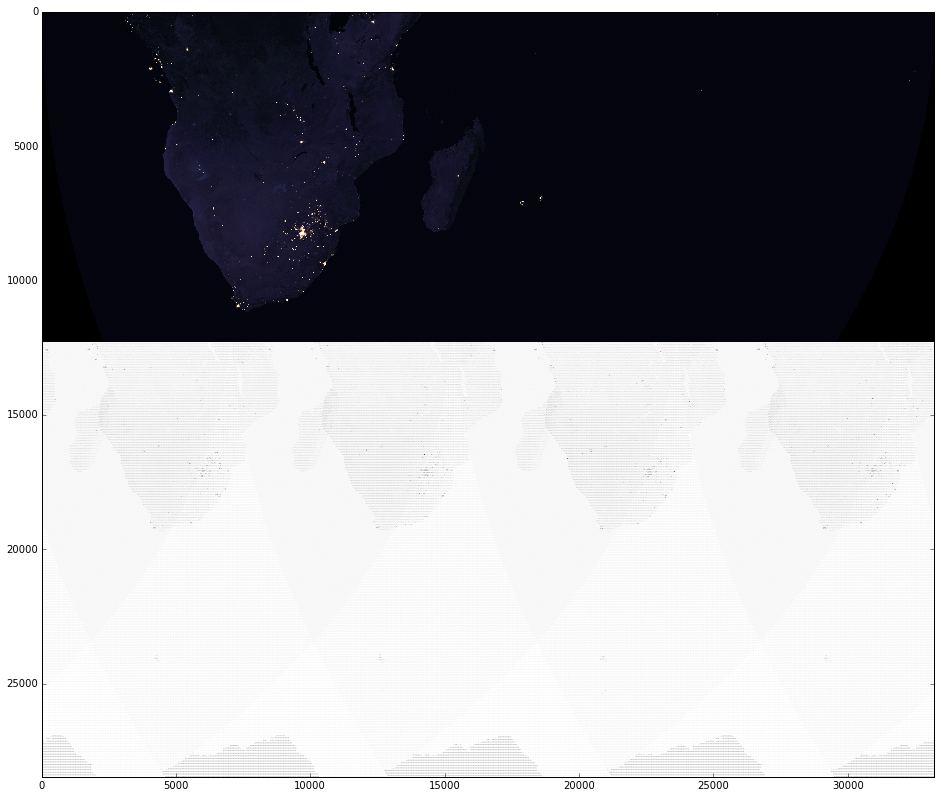

In [14]:
# *************PLOT SINGLE IMAGE ***************

import matplotlib.pyplot as plt
%matplotlib inline


plot_data = bands_data.squeeze()
plot_data.shape



plt.figure(figsize=[16,16])
plt.imshow(plot_data)


